# **Módulo 2: Fundamentos de Python para aprendizagem de máquina**


In [16]:
import pandas as pd

# Carregar dados do Excel usando pandas
dados_red_Wine = pd.read_excel('Dados/winequality-red.xlsx')
dados_white_Wine = pd.read_excel('Dados/winequality-white.xlsx')

# Criar uma coluna adicional classificando o vinho como Vermelho = 1 ou Branco = 0
dados_red_Wine['TipoVinho'] = 1
dados_white_Wine['TipoVinho'] = 0

# Unificando os 2 dataframes em 1 unico conjunto de dados
dados_vinhos = pd.concat([dados_red_Wine, dados_white_Wine], ignore_index=True)


In [18]:
# Apenas por curiosidade, estou olhando a media das colunas, para verificar se algum valor se destaca para indicar o tipo do vinho
medias_red_Wine = dados_red_Wine.mean().map(lambda x: '{:.2f}'.format(x))
medias_red_Wine

fixed acidity                       8.32
volatile acidity                    3.88
citric acid                         0.27
residual sugar                      2.54
chlorides                           0.09
free sulfur dioxide                15.87
total sulfur dioxide               46.47
density                          1257.36
pH                                  3.31
sulphates                           0.66
alcohol                 1455284552855.91
quality                             5.64
TipoVinho                           1.00
dtype: object

In [19]:
medias_white_Wine = dados_white_Wine.mean().map(lambda x: '{:.2f}'.format(x))
medias_white_Wine

fixed acidity                       6.85
volatile acidity                    0.48
citric acid                         0.33
residual sugar                      6.39
chlorides                           0.05
free sulfur dioxide                35.31
total sulfur dioxide              138.36
density                           570.85
pH                                  3.19
sulphates                           0.49
alcohol                 1823233973060.66
quality                             5.88
TipoVinho                           0.00
dtype: object

In [12]:
dados_vinhos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,TipoVinho
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


# Campos Utilizados

Tinto:

- volatile acidity - 3.88- 09
free sulfur dio -     15- .87
total sulfur di -      4- 6.47
d -       1

Branco:

- volatile acidity - 0.48- 05
free sulfur dio -     35- .31
total sulfur di -      13- 8.36
d -       570.85257.3636

In [1]:
# Primeiro, é preciso importar os pacotes que serão usados para a visualização
# Isso pode ser ignorado por enquanto, pois será explicado em outro notebook
import numpy as np
import math, random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def single_neuron_regression_model(w, w_0, x):

    # Executar o produto escalar na entrada x e nos pesos aprendidos w
    z = 0
    for feature, weight in zip(x, w):
        z += feature * weight
    z += w_0  # Acrescentar termo de viés

    # Aplicar a função de ativação e devolver
    a = linear(z)
    return a

# Função de ativação linear simples: só devolve a identidade
def linear(z):
    return z

# A função de regressão de neurônio único foi escrita sem presumir quantas
# dimensões há nos dados de entrada (ou seja, pode haver só um atributo x,
# 10 atributos ou qualquer outra quantidade). Isso é essencial para que
# o modelo possa aprender usando um conjunto de dados com qualquer vetor de dimensão x.

In [2]:
# Teste: saída do modelo para um único ponto de dados em 2D:
x = [1, 2]
w = [5, 3]
w_0 = -8

y = single_neuron_regression_model(w, w_0, x)
print("input", x, "=> output", y)

input [1, 2] => output 3


## Treinamento do modelo de regressão – descida do gradiente

Agora que implementamos uma função de modelo de regressão, podemos usá-la para fazer previsões para qualquer entrada arbitrária. No entanto, sem um conjunto de pesos treinados, a função de previsão do modelo não fará boas previsões com base nos dados que fornecermos.

Para resolver esse problema, é preciso implementar um algoritmo que encontre pesos $w$ e $w_0$ adequados e baseados no conjunto de dados. Usaremos a descida do gradiente, um pilar da aprendizagem profunda, para encontrar pesos que minimizem uma função de custo, $J$, em que $J$ é a perda (*loss*) total $L$ nos dados de treinamento:

$$ J = \sum_i^n L(\hat{y}^{(i)}, y^{(i)})$$

Começaremos com uma função de perda relativamente simples, apropriada para um problema de regressão: usaremos a perda de erro quadrático, em que $\epsilon^{(i)}$ é o erro para qualquer amostra $i$:

$$ L_{SE}(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2} (\hat{y_i} - y_i)^2 = \frac{1}{2} \epsilon^2 $$

O processo de treinamento é o seguinte:
* Executamos o *loop* de treinamento para um número especificado de iterações ao longo do conjunto de dados, também conhecidas como épocas (*epochs*).
* Em cada época, analisamos cada par entrada-saída $(x^{(i)},y^{(i)})$. Para cada um desses pares:

  * Calculamos a perda $L$ entre o valor correto $y$ e o valor previsto $\hat{y}$;
  * Calculamos o gradiente da perda em relação a cada peso;
  * Atualizamos os pesos com base no gradiente e na taxa de aprendizagem, $\eta$:

$$ w_{j,new} = w_j - \eta \frac{dJ}{dw_j}$$

Este é o conceito básico da aprendizagem baseada em gradiente: estamos "empurrando" cada peso ao longo do gradiente da função de custo em relação a esse peso para ajudar a rede neural a prever com mais precisão.

### Descida do gradiente com perda de erro quadrático

Para cada ponto de dados de amostra $i$, o processo é o seguinte:

$$ \frac{dJ}{dw_j} = \frac{dL_{SE}}{dw_j}
  = \frac{dL_{SE}}{d\hat{y}} \frac{d\hat{y}}{dw_j}
  = (\hat{y} - y) \frac{d\hat{y}}{dw_j} $$

É importante saber que precisamos ser capazes de calcular o gradiente da saída do modelo em relação a cada peso:

$$ \frac{d\hat{y}}{dw_j} = \frac{df(z)}{dz} \frac{dz}{dw_j} $$

Para a função de ativação linear $f(z) = z$, o primeiro termo é muito simples: $\frac{df(z)}{dz} = 1$.

Para o segundo termo, recordemos que:

$$ z = w_0 + x_1 \cdot w_1 + \cdots + x_j \cdot w_j + \dots + x_m \cdot w_m $$

portanto, $\frac{dz}{dw_j} = x_j$, exceto para $w_0$, em que $\frac{dz}{dw_0} = 1.$

### Implementação da descida do gradiente – perda de erro quadrático:

In [3]:
# Vamos agora definir a função de treinamento para o caso da perda de erro quadrático
# Mais uma vez, faremos com que ela seja indiferente às dimensões dos dados de entrada
# e flexível para funcionar com funções de diferentes modelos
def train_model_SE_loss(model_function, w, w_0,
                        input_data, output_data,
                        learning_rate, num_epochs):
    do_print = False
    for epoch in range(num_epochs):
        total_loss = 0 # Acompanhar a perda total ao longo do conjunto de dados
        for x, y in zip(input_data, output_data):
            y_predicted = model_function(w, w_0, x)
            error = y_predicted - y
            total_loss += (error**2)/2
            if do_print: print("x:", x, "y:", y, "error:", error)
            if do_print: print(" old weights:", w, w_0)

            # Atualizar o coeficiente de viés usando gradiente em relação a w_0
            w_0 -= learning_rate * error * 1

            # Atualizar outros coeficientes do modelo usando gradiente em relação a cada coeficiente
            for j, x_j in enumerate(x):
                w[j] -= learning_rate * error * x_j
            if do_print: print(" new weights:", w, w_0)

        report_every = max(1, num_epochs // 10)
        if epoch % report_every == 0: # Informar progresso de poucas em poucas épocas
            print("epoch", epoch, "has total loss", total_loss)

    return w, w_0

In [6]:
# Usaremos esta função para avaliar o desempenho do modelo
# de regressão treinado. Isso calculará o erro quadrático médio nos dados.
def evaluate_regression_accuracy(model_function, w, w_0, input_data, output_data):
    total_loss = 0
    n = len(input_data)
    for x, y in zip(input_data, output_data):
        y_predicted = model_function(w, w_0, x)
        error = y_predicted - y
        total_loss += (error**2)/2
    accuracy = total_loss / n
    print("Our model has mean square error of", accuracy)
    return accuracy

## Exemplo de regressão com neurônio único

Agora que temos a função do modelo de regressão e uma função de treinamento, falta apenas chamar cada uma dessas funções em um conjunto de dados. Abaixo, treinaremos o neurônio único em um conjunto de dados de teste e visualizaremos o ajuste.

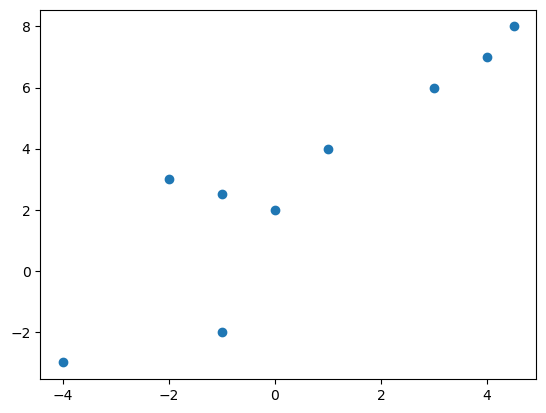

In [7]:
# Temos um conjunto simples em 1D de dados de entrada: uma lista de pontos x,
# cada um deles uma lista de extensão 1, com uma resposta y correspondente.
X_1D = [[1], [-2], [3], [4.5], [0], [-4], [-1], [4], [-1]]
Y_1D = [4,   3,    6,   8,     2,   -3,   -2,   7,   2.5]

# Esta função de utilidade nos permitirá visualizar um dado conjunto de dados em 1D.
# Não é necessário compreender este código neste momento.
def plot_dataset_1D(x, y):
    x_np = np.array(x)
    y_np = np.array(y)
    plt.scatter(x_np[...,0], y_np)

# Esta função de utilidade nos permitirá visualizar um ajuste 1D
def plot_fit_1D(X, w, w_0):
    ylim = plt.ylim()
    x_np = np.array(X)
    y_pred = np.array([single_neuron_regression_model(w, w_0, x) for x in X])
    plt.plot(x_np[...,0], y_pred, color="red")
    plt.ylim(ylim)

# Visualizar o conjunto de dados acima
plot_dataset_1D(X_1D, Y_1D)
# plot_fit_1D(X_1D, [1, 2], 0.5)

### Aprender os pesos para o modelo de regressão

epoch 0 has total loss 75.15118164194563
epoch 1 has total loss 40.109157956509094
epoch 2 has total loss 29.801523004849642
epoch 3 has total loss 25.47970121810249
epoch 4 has total loss 22.84563043777799
epoch 5 has total loss 20.86922066083035
epoch 6 has total loss 19.269845776759738
epoch 7 has total loss 17.945486824052068
epoch 8 has total loss 16.841512143299816
epoch 9 has total loss 15.91945696552539
epoch 10 has total loss 15.148892782711584

Final weights:
[1.2616634248232683] 1.589875809042491
Our model has mean square error of 1.5758191255565894


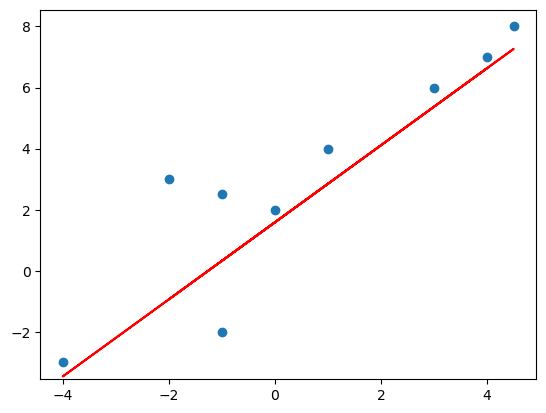

In [14]:
# Neste exemplo, definimos os pesos iniciais como zero
# e uma taxa de aprendizagem relativamente baixa
w_0 = 0
w = [0]
learning_rate = 0.01
epochs = 11

w, w_0 = train_model_SE_loss(single_neuron_regression_model, w, w_0,
                             X_1D, Y_1D,
                             learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_regression_accuracy(single_neuron_regression_model, w, w_0, X_1D, Y_1D)

plot_dataset_1D(X_1D, Y_1D)
plot_fit_1D(X_1D, w, w_0)

# Modelo de classificação de neurônio único
Para o problema de classificação, temos apenas que implementar algumas mudanças. Primeiramente, mudamos a função de ativação para uma sigmoide; isso reduz a pré-ativação $z$ a uma ativação (saída) entre 0 e 1. Também precisamos implementar o cálculo de gradiente com essa função de ativação sigmoide.

Por fim, para o problema de classificação, usaremos uma função de perda diferente: logaritmo negativo da verossimilhança (*negative log-likelihood*, NLL). Isso fará com que o código de treinamento anterior ainda funcione, mas para o problema de classificação, e não para o de regressão.

### Descida do gradiente com perda por logaritmo negativo da verossimilhança

Neste caso, para cada ponto de dados de amostra $i$, o gradiente de $J$ em relação aos pesos será:

$$ \frac{dJ}{dw_j} = \frac{dL_{NLL}}{dw_j}
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dw_j}
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dz} \frac{dz}{dw_j}
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\sigma{(z)}}{dz} \frac{dz}{dw_j} .
 $$

Para o primeiro termo, chamamos novamente a definição $L_{NLL} = y \log{\hat{y}} + (1-y)\log{(1-\hat{y})}$,
o que dá o seguinte resultado:

$$ \frac{dL_{NLL}}{d\hat{y}} = \frac{y-\hat{y}}{\hat{y}(1-\hat{y})} .$$

Para o segundo termo, a derivada da função de ativação $\sigma(z)$, obtemos:

$$ \frac{d\sigma{(z)}}{dz} = \sigma(z)(1-\sigma(z)  = \hat{y}(1-\hat{y}).$$

O último termo é, simplesmente, $\frac{dz}{dw_j} = x$, exceto para $\frac{dz}{dw_0} = 1$.


In [16]:
def single_neuron_classification_model(w, w_0, x):
    # Executar o produto escalar na entrada x e nos pesos aprendidos w
    z = 0
    for feature, weight in zip(x, w):
        z += feature * weight
    z += w_0  # Adicionar o termo de viés

    # Aplicar a função de ativação e devolver
    a = sigmoid(z) # ÚNICA MUDANÇA
    return a

# Função de ativação sigmoide; reduz um valor real z a um valor entre 0 e 1
def sigmoid(z):
    non_zero_tolerance = 1e-8 # Adicionar isto às divisões para garantir que não se divida por 0
    return 1 / (1 + math.exp(-z) + non_zero_tolerance)

<function matplotlib.pyplot.show(close=None, block=None)>

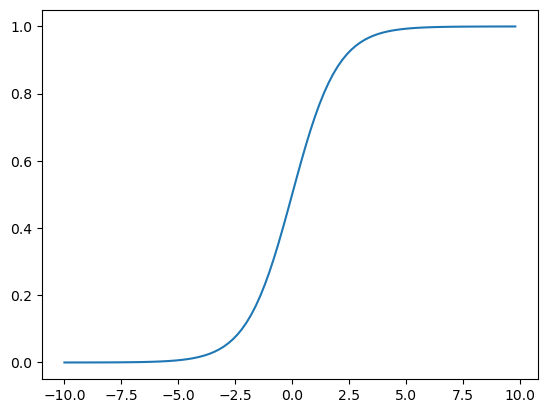

In [17]:
# Abaixo, visualizamos a função sigmoide:
sig_x = np.arange(-10, 10, .2)
sig_y = [sigmoid(x) for x in sig_x]
plt.plot(sig_x, sig_y)
plt.show

Podemos ver no gráfico acima que a função sigmoide "espreme" todas as entradas entre valores de 0 e 1. Isso é perfeito para nosso caso de regressão logística.

In [26]:
# Teste: saída do modelo para um único ponto de dados em 2D:
x = [1, 2]
w = [5, 3]
w_0 = -8

y = single_neuron_classification_model(w, w_0, x)
print("input", x, "=> output", y)

input [1, 2] => output 0.9525741177484588


## Exemplo de classificação com um único neurônio

Vamos agora treinar o classificador de neurônio único. Usaremos a  função de classificação e adaptaremos nossa função de treinamento para usar a perda NLL.

In [27]:
# Processo de treinamento com o uso da perda por logaritmo negativo da verossimilhança (NLL) -
# apropriada para problemas de classificação.
#
def train_model_NLL_loss(model_function, w, w_0,
                         input_data, output_data,
                         learning_rate, num_epochs):
    non_zero_tolerance = 1e-8 # Adicionar isto aos cálculos de log para assegurar que não se faça log de 0
    do_print = False
    for epoch in range(num_epochs):
        total_loss = 0 # Acompanhar a perda total ao longo do conjunto de dados
        for x, y in zip(input_data, output_data):
            y_predicted = model_function(w, w_0, x)
            nll_loss = -(y * math.log(y_predicted + non_zero_tolerance) + (1-y) * math.log(1-y_predicted + non_zero_tolerance))

            total_loss += nll_loss
            if do_print: print("x:", x, "y:", y, "nll_loss:", nll_loss)
            if do_print: print(" old weights:", w, w_0)

            # Atualizar o coeficente de viés usando gradiente em relação a w_0
            w_0 -= learning_rate * (y_predicted - y)

            # Atualizar outros coeficientes do modelo usando gradiente em relação a cada coeficiente
            for j, x_j in enumerate(x):
                w[j] -= learning_rate * (y_predicted - y) * x_j

            if do_print: print(" new weights:", w, w_0)

        report_every = max(1, num_epochs // 10)
        if epoch % report_every == 0: # Informar progresso de poucas em poucas épocas
            print("epoch", epoch, "has total loss", total_loss)

    return w, w_0

In [28]:
# Usaremos esta função para avaliar o desempenho do classificador treinado
def evaluate_classification_accuracy(model_function, w, w_0, input_data, labels):
    # Contar o número de amostras corretamente classificadas dado um conjunto de pesos
    correct = 0
    n = len(input_data)
    for x, y in zip(input_data, labels):
        y_predicted = model_function(w, w_0, x)
        label_predicted = 1 if y_predicted > 0.5 else 0
        if label_predicted == y:
            correct += 1
        else:
            print("Misclassify", x, y, "with activation", y_predicted)
    accuracy = correct / n
    print("Our model predicted", correct, "out of", n,
          "correctly for", accuracy*100, "% accuracy")
    return accuracy

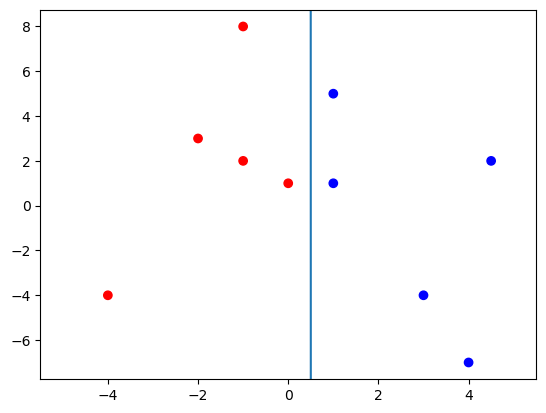

In [29]:
# Temos aqui um conjunto com pontos de dados linearmente separáveis em 2D
input_data = [[1, 1],
              [1, 5],
              [-2, 3],
              [3, -4],
              [4.5, 2],
              [0, 1],
              [-4, -4],
              [-1, 2],
              [4, -7],
              [-1, 8]]
# e seus rótulos correspondentes
labels = [1, 1, 0, 1, 1, 0, 0, 0, 1, 0]

# Esta função de utilidade nos permitirá visualizar um determinado conjunto de dados em 2D.
# Não é preciso compreender este código neste momento.
def plot_dataset_2D(x, y):
    x_np = np.array(x)
    x_np.reshape(len(x), 2)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    plt.scatter(x_np[...,0], x_np[...,1], color=colors)

# Esta função de utilidade nos permitirá visualizar uma fronteira de decisão em 2D
def plot_decision_boundary_2D(w, w_0):
    ylim = plt.ylim()
    x1 = np.arange(-5,6)
    plt.plot(x1, (-w_0 - w[0]*x1)/w[1])
    plt.ylim(ylim)

# Visualizar o conjunto de dados acima
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D([1, 0.0001], -0.5)


Podemos ver no gráfico que o conjunto de dados é separável linearmente, o que significa que podemos separar as amostras positivas (em azul) das amostras negativas (em vermelho) com uma linha reta.

## Treinamento de pesos reais – classificador de neurônio único

Agora que temos um conjunto de dados, queremos treinar nosso modelo de classificação de neurônio único para encontrar um conjunto de pesos que classifique os dados com precisão. Para isso, temos três elementos diferentes com os quais podemos trabalhar: pesos iniciais, taxa de aprendizagem e número de épocas. Nos exemplos a seguir, veremos como cada um deles impacta a capacidade do modelo para convergir em uma fronteira de decisão precisa.

Como regra geral, é desejável que a taxa de aprendizagem seja baixa em comparação com os valores dos dados de entrada, que os pesos iniciais sejam relativamente baixos (frequentemente inicializados aleatoriamente) e que o número de épocas seja relativamente alto. Esta é apenas uma simplificação, já que muita pesquisa foi feita para determinar os valores ideais desses parâmetros.

epoch 0 has total loss 6.508594077659496
epoch 1 has total loss 5.46211191013139
epoch 2 has total loss 4.821047709918714
epoch 3 has total loss 4.376407793867182
epoch 4 has total loss 4.044631318017442
epoch 5 has total loss 3.785495957355281
epoch 6 has total loss 3.5764951960506712
epoch 7 has total loss 3.4037356044647034
epoch 8 has total loss 3.2580744775443593
epoch 9 has total loss 3.1332214359416266
epoch 10 has total loss 3.0247010050826195

Final weights:
[0.5960284097028588, -0.13469258109084148] -0.010512924479684558
Misclassify [1, 5] 1 with activation 0.47802730360403245
Our model predicted 9 out of 10 correctly for 90.0 % accuracy


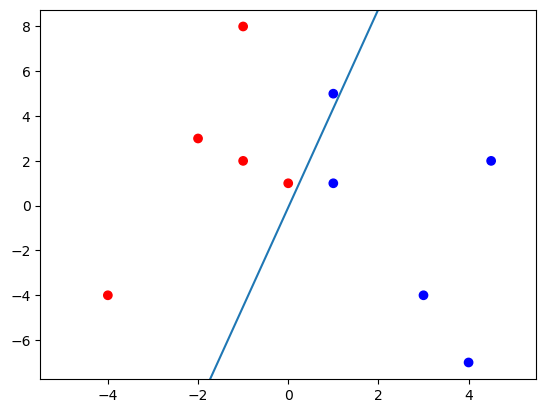

In [30]:
# Neste exemplo, definimos os pesos iniciais como zero e uma taxa
# de aprendizagem relativamente baixa. Porém, treinamos somente por
# algumas épocas, o que não é suficiente para convergir em um classificador preciso.
w_0 = 0
w = [0, 0]
learning_rate = 0.01
epochs = 11

w, w_0 = train_model_NLL_loss(single_neuron_classification_model, w, w_0,
                              input_data, labels,
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_classification_model, w, w_0, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(w, w_0)

epoch 0 has total loss 6.223923692215003
epoch 10 has total loss 2.9287154378367712
epoch 20 has total loss 2.3584449039881488
epoch 30 has total loss 2.0636076120006903
epoch 40 has total loss 1.8696299804962355
epoch 50 has total loss 1.7267167165811537
epoch 60 has total loss 1.6144108218404705
epoch 70 has total loss 1.5224295144979199
epoch 80 has total loss 1.4448950765018669
epoch 90 has total loss 1.3781364940480267
epoch 100 has total loss 1.319708591557062

Final weights:
[1.7028723012501872, -0.09064040426016721] -0.1352352402813103
Our model predicted 10 out of 10 correctly for 100.0 % accuracy


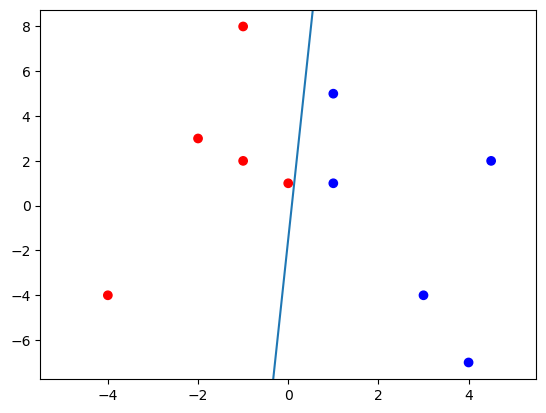

In [31]:
# Em geral, não é muito bom inicializar todos os pesos em zero.
# Usaremos aqui alguns valores baixos que não sejam zero
# e treinaremos por mais épocas.
w_0 = 0.1
w = [0.1, 0.1]

# Na prática, os pesos costumam ser inicializados de forma aleatória,
# por exemplo, com valores normais (gaussianos), o que funciona bem
# quando os dados de entrada são normalizados (diferentemente dos nossos dados).

# Pode-se também testar as seguintes opções (retirando o formato de comentário):
## w_0 = random.gauss(0,1)
## w = [random.gauss(0,1) for i in range(2)]

learning_rate = 0.01
epochs = 101

w, w_0 = train_model_NLL_loss(single_neuron_classification_model, w, w_0,
                              input_data, labels,
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_classification_model, w, w_0, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(w, w_0)

## Prática: conjunto de dados em 3D

Depois de termos implementado o classificador simples de neurônio único em um conjunto de dados em 2D, agora é sua vez. Forneceremos um conjunto de dados em 3D e você deverá usá-lo para treinar um classificador de neurônio único:

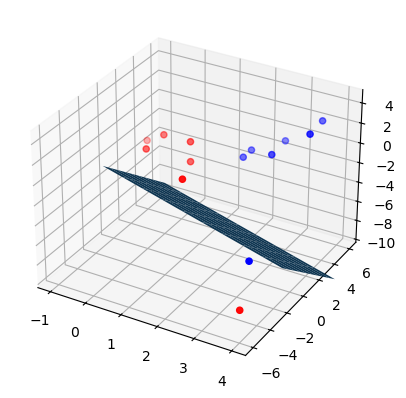

In [32]:
# ESTOU AQUI
# Temos abaixo um conjunto de dados em 3D de amostras binárias rotuladas.
# Você deve usar as funções existentes para treinar um perceptron
# que classifique perfeitamente o conjunto de dados com um plano de decisão.
input_data = [
     [1,1,1],
     [1,1,-1],
     [-1,4,-3],
     [2,4,-1],
     [3.5,6,2],
     [4,-6,-7],
     [2,-4,2],
     [4,-5,-3],
     [0,2,0],
     [3,2,1],
     [4,2,4],
     [2.5,6,-1],
     [0,0,0],
     [2,3,-1]]
labels = [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]

# Esta é uma função de utilidade para a exibição do conjunto de dados em um gráfico em 3D.
# Não é necessário compreender este código neste momento.
def plot_3d_dataset(x, y):
    x_np_3d = np.array(x)
    x_np_3d.reshape(len(x),3)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(x_np_3d[...,0], x_np_3d[...,1],x_np_3d[...,2], color = colors)
    return ax

# Esta é uma função de utilidade para a exibição
# da fronteira de decisão em 3D para um dado conjunto de pesos.
def plot_3d_decision_boundary(ax, w, w_0):
  x = np.linspace(-1,4,10)
  y = np.linspace(-1,6,10)
  X,Y = np.meshgrid(x,y)
  Z = (-X*w[0] - Y*w[1] - w_0)/w[2]
  surf = ax.plot_surface(X, Y, Z)
  ax.set_zlim(-10,5)
  return
ax = plot_3d_dataset(input_data, labels)
plot_3d_decision_boundary(ax, [1,1,1], 4)

In [34]:
# EXERCÍCIO: Complete o código a seguir para encontrar um conjunto de pesos
# que classifique o conjunto de dados com precisão de 90% ou mais:
w_0 = ...
w = ...

# ESCREVER CÓDIGO AQUI

# print("\nFinal weights:")
# print(w, w_0)
# evaluate_classification_accuracy(...)
# ax = plot_3d_dataset(input_data, labels)
# plot_3d_decision_boundary(ax, w, w_0)

## Solução para o exemplo do conjunto de dados em 3D

epoch 0 has total loss 8.363485666615288
epoch 10 has total loss 7.129679198130538
epoch 20 has total loss 6.513824362841735
epoch 30 has total loss 6.013497796393884
epoch 40 has total loss 5.588910141366436
epoch 50 has total loss 5.224544288901733
epoch 60 has total loss 4.909687253968319
epoch 70 has total loss 4.635809135238037
epoch 80 has total loss 4.395976969470983
epoch 90 has total loss 4.1845562286780265
epoch 100 has total loss 3.9969710083658487

Final weights:
[1.052996389310848, 0.3737356267223445, 0.18169076458208044] -1.5713639671880502
Misclassify [1, 1, 1] 0 with activation 0.5092636405978489
Our model predicted 13 out of 14 correctly for 92.85714285714286 % accuracy


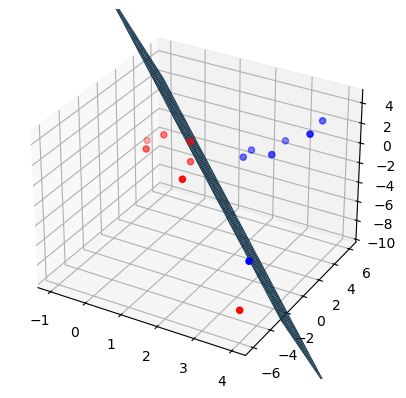

In [35]:
w_0 = 0.1
w = [0.1, 0.1, 0.1]

#random.seed(123)
#w_0 = random.gauss(0,1)
#w = [random.gauss(0,1) for i in range(3)]

learning_rate = 0.01
epochs = 101

w, w_0 = train_model_NLL_loss(single_neuron_classification_model, w, w_0,
                              input_data, labels,
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_classification_model, w, w_0, input_data, labels)
ax = plot_3d_dataset(input_data, labels)
plot_3d_decision_boundary(ax, w, w_0)

## Dados não separáveis linearmente

A partir do exemplo acima, podemos ver que, dados os parâmetros de treinamento corretos, nosso classificador de neurônio único pode classificar perfeitamente qualquer conjunto de dados separável linearmente, para entradas de quaisquer dimensões. Isso tem muita força; porém, é também limitador, considerando que a maioria das coisas com as quais nos importamos no mundo real não são separáveis linearmente (por exemplo, imagens, texto, dados financeiros complexos).

Podemos ver abaixo um conjunto de dados não separável linearmente, criado com a alteração dos rótulos de um dos pontos de dados dos exemplos anteriores. Se o conjunto de dados não é separável linearmente, o classificador de neurônio único não será capaz de encontrar um classificador perfeito. Esta é uma limitação importante desta rede neural pouco profunda, composta por um único neurônio. No entanto, nosso algoritmo de treinamento por descida do gradiente ainda tentará encontrar pesos adequados para minimizar a perda geral – e fará um bom trabalho nisso.

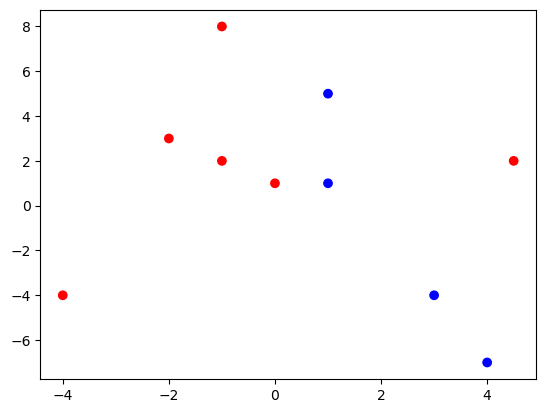

In [36]:
input_data = [
     [1, 1],
     [1, 5],
     [-2, 3],
     [3, -4],
     [4.5, 2],
     [0, 1],
     [-4, -4],
     [-1, 2],
     [4, -7],
     [-1, 8]]
# Ao mudar o rótulo da entrada [4.5, 2],
# tornamos este conjunto de dados não separável linearmente.
labels = [1, 1, 0, 1, 0, 0, 0, 0, 1, 0]

plot_dataset_2D(input_data, labels)

epoch 0 has total loss 7.1243063294158455
epoch 10 has total loss 5.314006910645079
epoch 20 has total loss 5.206572113401352
epoch 30 has total loss 5.149470079687033
epoch 40 has total loss 5.109997902040252
epoch 50 has total loss 5.081327640477265
epoch 60 has total loss 5.060334092542722
epoch 70 has total loss 5.0449323579547345
epoch 80 has total loss 5.033617113584548
epoch 90 has total loss 5.025292821561975
epoch 100 has total loss 5.019162298596705

Final weights:
[0.430791235345579, -0.18136382362069903] -0.4757743787113749
Misclassify [1, 1] 1 with activation 0.4436536170610267
Misclassify [1, 5] 1 with activation 0.27852251634038405
Misclassify [4.5, 2] 0 with activation 0.7502710671457287
Our model predicted 7 out of 10 correctly for 70.0 % accuracy


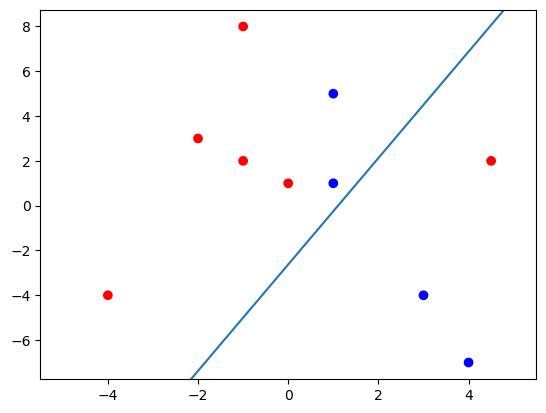

In [37]:
# Indepententemente dos parâmetros que escolhermos, o classificador
# de neurônio único não será capaz de treinar um classificador perfeito.
# Pesos adequados, taxa de aprendizagem baixa, épocas normais.
w_0 = 0.1
w = [0.1, 0.1]
learning_rate = 0.01
epochs = 101

w, w_0 = train_model_NLL_loss(single_neuron_classification_model, w, w_0,
                              input_data, labels,
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_classification_model, w, w_0, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(w, w_0)

## *Perceptrons* de múltiplas camadas – rumo a redes neurais mais profundas

Encontramos uma tarefa que nossos modelos simples de neurônio único não podem solucionar, o que exige a introdução de novos conceitos. Para trabalhar com esse conjunto de dados não separável linearmente (e com outras relações complexas), precisaremos expandir nossa rede com um único neurônio a uma rede neural mais sofisticada: um *perceptron* multicamadas (MLP, *multilayer perceptron*). Nosso neurônio único será um componente importante para a construção de redes neurais profundas, com a adição de extensões.

Em vez de implementar redes neurais mais complexas diretamente em Python básico, passaremos a usar bibliotecas de aprendizagem de máquina já existentes, as quais implementam **múltiplas camadas**, além de permitir que cada camada tenha **múltiplos nós**. É importante ressaltar que essas bibliotecas usam os conceitos fundamentais que implementamos acima: a capacidade de calcular a saída da camada **e** o gradiente da saída da camada em relação aos pesos, de forma que a descida do gradiente ainda possa ser usada para ajustar e aprender os pesos da rede durante o treinamento.